<a href="https://colab.research.google.com/github/isnyel/tj_jeon/blob/main/yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

fatal: destination path 'darknet' already exists and is not an empty directory.


In [6]:
# change makefile to have GPU and OPENCV enabled
%cd /content/darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/content/darknet


In [7]:
from google.colab import drive
drive.mount('/content/drive')
#If you have a zipped darknet
%cd /content/darknet
!make
!chmod +x ./darknet
!ln -s /content/drive/'My Drive'/backup /content/darknet
!sudo apt install dos2unix
!dos2unix ./data/train.txt
!dos2unix ./data/test.txt
!dos2unix ./data/tiny-1.data
!dos2unix ./cfg/yolov4-tiny-3l.cfg
#To start the training
%cd /content/darknet

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/darknet
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:

In [5]:
!chmod +x ./darknet

In [6]:
!./darknet detector

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
usage: ./darknet detector [train/test/valid/demo/map] [data] [cfg] [weights (optional)]


In [ ]:
#training
!./darknet detector train data/tiny-1.data cfg/yolov4-tiny-3l.cfg yolov4-tiny-3l_last.weights -dont_show -clear

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
yolov4-tiny-3l
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 64, batch = 64, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 2    320 x 320 x   3 ->  160 x 160 x  32 0.044 BF
   1 conv     64       3 x 3/ 2    160 x 160 x  32 ->   80 x  80 x  64 0.236 BF
   2 conv     64       3 x 3/ 1     80 x  80 x  64 ->   80 x  80 x  64 0.472 BF
   3 route  2 		                       1/2 ->   80 x  80 x  32 
   4 conv     32       3 x 3/ 1     80 x  80 x  32 ->   80 x  80 x  32 0.118 BF
   5 conv     32       3 x 3/ 1     80 x  80 x  32 ->   80 x  80 x  32 0.118 BF
   6 route  5 4 	                           ->   80 x  80 x  64 
   7 conv     64       1 x 1/ 1     80 x  80 x  64 ->   80 x  80 x  64 0.052 BF
   8 route  2 7 	                           ->   80 x

In [ ]:
#!./darknet detector map data/tiny-1.data cfg/yolov4-tiny-3l.cfg yolov4-tiny-3l_last.weights 

Download pre-trained 

In [ ]:
#download the newly released yolov4-tiny weights
#%cd /content/darknet
#!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v4_pre/yolov4-tiny.weights
#!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v4_pre/yolov4-tiny.conv.29

**Define Helper Functions**
These three functions are helper functions that will allow you to show the image in your Colab Notebook after running your detections, as well as upload and download images to and from your Cloud VM.

In [ ]:
# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)


In [ ]:
# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

In [ ]:
id -u

NameError: ignored

Run Your Detections with Darknet and YOLOv4!

In [ ]:
#drive/MyDrive/backup/content/darknet weight.-> to darknet folder
!./darknet detector test data/tiny-1.data cfg/yolov4-tiny-3l.cfg /content/drive/MyDrive/backup/content/darknet/yolov4-tiny-3l_last.weights -thresh 0.20

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
Couldn't open file: data/tiny-1.data


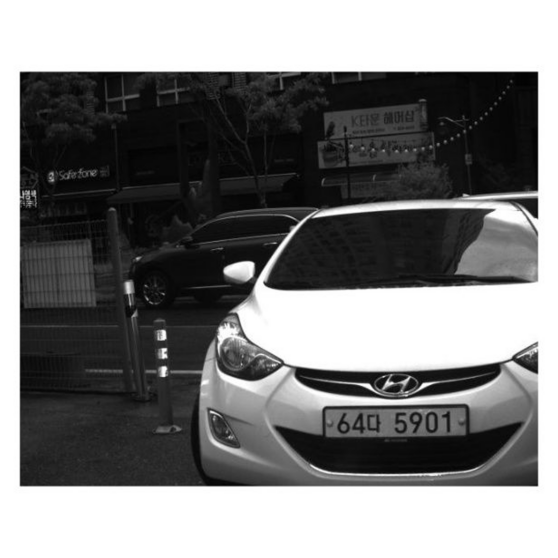

In [ ]:
# show image using our helper function
imShow('predictions.jpg')

In [ ]:
# This stops 'Run all' at this cell by causing an error
assert False

AssertionError: ignored

In [ ]:
%cd ..
upload()
%cd darknet

In [ ]:
%cd /content/gdrive/MyDrive/dark


/content/gdrive/MyDrive/dark


In [ ]:
!chmod +x ./darknet
!./darknet detector

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
usage: ./darknet detector [train/test/valid/demo/map] [data] [cfg] [weights (optional)]


In [ ]:
!./darknet detector train custom.data pose/yolov4-tiny-3l.cfg yolov4-tiny-3l_final.weights -dont_show

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
Couldn't open file: pose/custom.data
